In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
#Reading All the Files
train = pd.read_csv('/content/drive/MyDrive/python workshop/train.csv')


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
print(train.size)

10692


In [ ]:
print(train.shape)

(891, 12)


In [ ]:
train.isnull().sum() # total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
print(train.shape)
print(train.size)

(891, 12)
10692


In [ ]:
#Data Preprocessing Using PCA

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train = train.drop(columns = ['Cabin'])
train = train.drop(columns = ['Name'])
train = train.drop(columns = ['Ticket'])
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


In [ ]:
train = train.drop(columns = ['Embarked'])


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [ ]:
#AGE                #Replacing nan values with mean values
from sklearn.impute import SimpleImputer
missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
X=train.iloc[:,4].values
X=X.reshape(-1,1)# to maintain shape of data
train.iloc[:,4] = missingvalueimputer.fit_transform(X)

train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
  #GENDER               # Converting String to float
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = train.iloc[:,3].values
train.iloc[:,3] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:

train.heatrain = train[['PassengerId' ,'Pclass' ,'Sex' ,'Age' ,'SibSp' ,'Parch' ,'Fare' , 'Survived']]

X = train[['PassengerId' ,'Pclass' ,'Sex' ,'Age' ,'SibSp' ,'Parch' ,'Fare' ]]
y = train[['Survived']]

<ipython-input-25-8c653c8493cb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.heatrain = train[['PassengerId' ,'Pclass' ,'Sex' ,'Age' ,'SibSp' ,'Parch' ,'Fare' , 'Survived']]


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_min= mms.fit_transform(X_train)
X_test_min = mms.transform(X_test)
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components =2)              # Convert All the columns into two components/columns
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca =pca.transform(X_train_norm)
X_train_pca = pca.fit_transform(X_test_norm)
X_test_pca =pca.transform(X_test_norm)
pca.explained_variance_ratio_





array([0.277384  , 0.22996429])

0.7757847533632287
              precision    recall  f1-score   support

    survived       0.84      0.82      0.83       148
not survived       0.66      0.68      0.67        75

    accuracy                           0.78       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.78      0.78      0.78       223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


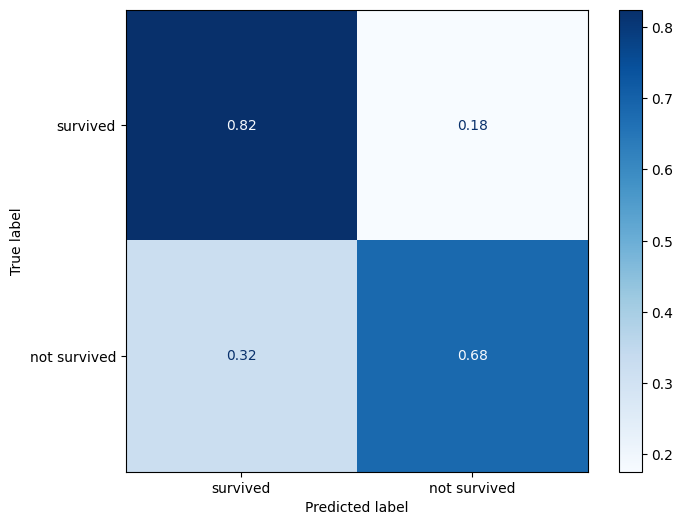

In [ ]:
#Logistic Regression MinMax
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
lgr = LogisticRegression()
lgr.fit(X_train_min , Y_train)

prediction = lgr.predict(X_test_min)
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


0.7757847533632287
              precision    recall  f1-score   support

    survived       0.84      0.82      0.83       148
not survived       0.66      0.68      0.67        75

    accuracy                           0.78       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.78      0.78      0.78       223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


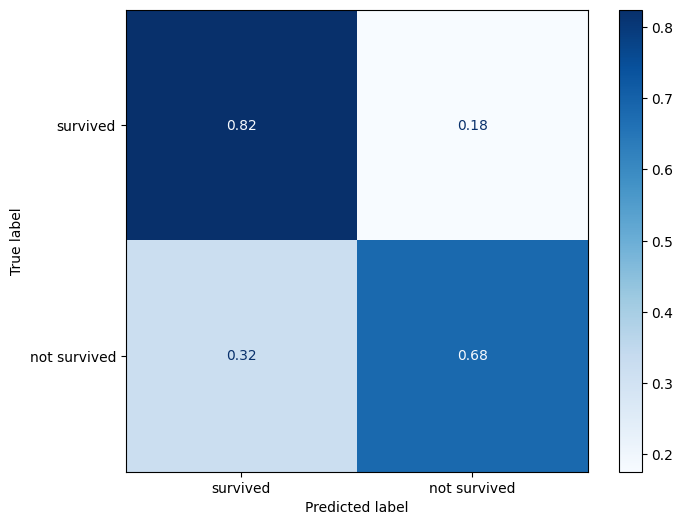

In [ ]:
#Logistic Regression PCA
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_min , Y_train)

prediction = lgr.predict(X_test_min)
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


0.7713004484304933
              precision    recall  f1-score   support

    survived       0.83      0.83      0.83       148
not survived       0.66      0.65      0.66        75

    accuracy                           0.77       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.77      0.77      0.77       223



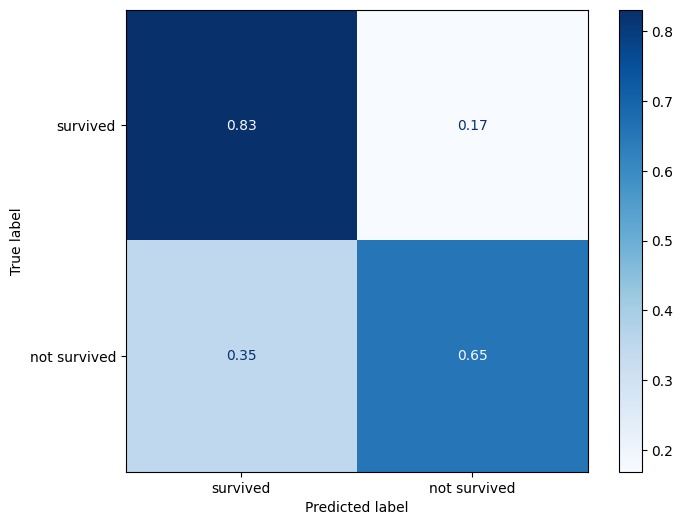

In [ ]:
#Decision Tree MINMAX  # Criteria = gini,entropy
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state = 0)
dt.fit(X_train_min , Y_train)

prediction = dt.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#Decision Tree PCA
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
dt.fit(X_train_pca , Y_train)

prediction = dt.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


ValueError: Number of labels=668 does not match number of samples=223

In [ ]:
#Random Forest MINMAX
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
rfc.fit(X_train_min , Y_train)

prediction = rfc.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#Random Forest PCA
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
rfc.fit(X_train_pca , Y_train)

prediction = rfc.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#KNN Algorithm PCA
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_pca , Y_train)

prediction =knn.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#KMeans MINMAX
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0)

kmeans.fit(X_train_min,Y_train)
prediction = kmeans.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0 )

kmeans.fit(X_train_pca,Y_train)
prediction = kmeans.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#navbayes gaussian minmax
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_min, Y_train)

prediction = model.predict(X_test_min)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#navbayes gaussian pca
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_pca, Y_train)

prediction = model.predict(X_test_pca)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


In [ ]:
#SVM minmax
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_min, Y_train)

prediction = svc.predict(X_test_min)
prediction

accuracy = metrics.accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
